<a href="https://colab.research.google.com/github/Nalin-khanna/nalin/blob/main/implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Problem statement***


1.   you are provided with a .csv file which contains experience of the employee (in months) and the salary of the employee (in thousand).
2.   Your task is to help the employer in predicting the salary he has to give to a employee based on his past experience
3. For this you need to understand the basic principle and functionining of linear regression and complete the functions below.
4. IT IS IMPORTANT TO COMPLETE EVERY BLOCK OF CODE IN THIS COLAB FILE .

# **Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import copy

 **import data file**

 **clean the data upto 2 decimal places for both experience and salary columns**

**test size = 20%**

**reshape the values by using concept of feature matrix**

In [6]:

#implement this code on your own
df = pd.read_csv('Experience-Salary.csv')
#  code starts here

# Clean the columns to display up to two decimal places
df['exp(in months)'] = df['exp(in months)'].round(2)
df['salary(in thousands)'] = df['salary(in thousands)'].round(2)
from sklearn.model_selection import train_test_split
# Print the cleaned DataFrame
print(df)
from sklearn.model_selection import train_test_split
X = df[['exp(in months)']]  # Features
y = df['salary(in thousands)']        # Target variable

# Split the data into training and testing sets with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


# code ends here

     exp(in months)  salary(in thousands)
0             18.29                 16.52
1             17.02                 11.67
2             26.34                 23.17
3             19.11                 20.88
4             27.74                 23.17
..              ...                   ...
995           22.16                 24.67
996           32.27                 24.16
997           17.04                 19.90
998           25.22                 21.97
999           16.42                 19.63

[1000 rows x 2 columns]


In [49]:
# Run this code without making any changes


# !!!!       IMP   !!!!!!!
# X_train refers to the training data ( experience) for the model
# y_train refers to the training data (salary )   for the model




print("Type of x_train:",type(X_train))
print("First five elements of x_train are:\n", X_train[:5])
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])
print ('The shape of x_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

Type of x_train: <class 'pandas.core.frame.DataFrame'>
First five elements of x_train are:
      exp(in months)
970           34.52
137            3.57
82            28.65
188           18.85
358           30.19
Type of y_train: <class 'pandas.core.series.Series'>
First five elements of y_train are:
 970    33.86
137    17.60
82     25.74
188    25.60
358    31.18
Name: salary(in thousands), dtype: float64
The shape of x_train is: (800, 1)
The shape of y_train is:  (800,)
Number of training examples (m): 800


 Plot the data using scatter plot



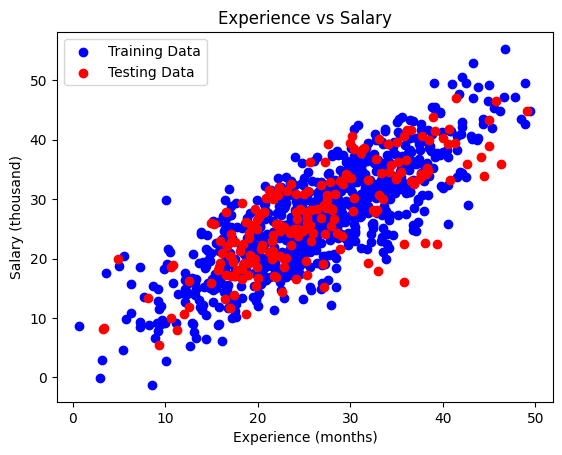

In [8]:
#plot data for visualisation

###code starts here

# Plotting for the training set
plt.scatter(X_train_feature_matrix, y_train, color='blue', label='Training Data')

# Plotting for the testing set
plt.scatter(X_test_feature_matrix, y_test, color='red', label='Testing Data')

# Adding labels and title
plt.xlabel('Experience (months)')
plt.ylabel('Salary (thousand)')
plt.title('Experience vs Salary')

# Adding a legend
plt.legend()

# Display the plot
plt.show()



###code ends here

In [51]:
# Convert X_train to a numpy array and reshape it if necessary
X_train_array = X_train.to_numpy()

# Convert y_train to a numpy array and reshape it
y_train_array = y_train.to_numpy().reshape(-1, 1)

# Check the shapes of X_train_array and y_train_array
print("X_train_array shape:", X_train_array.shape)
print("y_train_array shape:", y_train_array.shape)


X_train_array shape: (800, 1)
y_train_array shape: (800, 1)


**Implementation 1**

**complete the compute_cost() function below to compute the cost  𝐽(𝑤,𝑏)
 .**

In [52]:



def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
        x (ndarray): Shape (m,) Input to the model (experience in months)
        y (ndarray): Shape (m,) Label (Actual salaries)
        w, b (scalar): Parameters of the model

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    # You need to return this variable correctly
    total_cost = 0

    ### START CODE HERE ###
    y_pred = np.dot(x, w) + b
    total_cost = np.sum((y_pred - y) ** 2) / (2 * m)  # Mean Squared Error (MSE) formula

    ### END CODE HERE ###

    return total_cost

In [53]:
# Compute cost with some initial values for paramaters w, b
# Do not change the values in this code , simply run this block
initial_w = 0.9998
initial_b = 1


cost = compute_cost(X_train_array, y_train_array, initial_w, initial_b)
print(type(cost))
print(cost)


#output for cost should be around 14.406

<class 'numpy.float64'>
14.290505324602705


**Imlementation 2**


**implement a function called compute_gradient which calculates  ∂𝐽(𝑤)∂𝑤
 ,  ∂𝐽(𝑤)∂𝑏**

In [54]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities)
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    ### START CODE HERE ###
    # Compute predictions
    y_pred = np.dot(x, w) + b
    dj_dw = np.dot(x.T, (y_pred - y)) / m
    dj_db = np.sum(y_pred - y) / m

    ### END CODE HERE ###

    return dj_dw, dj_db

In [55]:
initial_w = 0.998
initial_b = 1
y_train_array = y_train.to_numpy().reshape(-1, 1)
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train_array, y_train_array, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

# output should be
#Gradient at initial w, b (zeros): [22.08482317] [0.36802405]

Gradient at initial w, b (zeros): [[24.09550935]] 0.46576320000000004


In [56]:
test_w = 0.2
test_b = 0.2
y_train_array = y_train.to_numpy().reshape(-1, 1)
tmp_dj_dw, tmp_dj_db = compute_gradient(X_train_array, y_train_array, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

#output should be
#Gradient at test w, b: [-600.2060557] [-21.2052925]

Gradient at test w, b: [[-606.04361607]] -21.266495


**!! do not change the below function just run it**

In [57]:

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w, b, J_history, w_history

 **Now let's run the gradient descent algorithm above to learn the parameters for our dataset.**

In [59]:
# you can alter the values of iterations, alpha to get the minimum cost and minimum values for w and b


# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2500
alpha = 0.0001

w,b,J_history,w_history = gradient_descent(X_train_array ,y_train_array, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost   340.36   
Iteration  250: Cost    14.26   
Iteration  500: Cost    14.25   
Iteration  750: Cost    14.25   
Iteration 1000: Cost    14.24   
Iteration 1250: Cost    14.24   
Iteration 1500: Cost    14.23   
Iteration 1750: Cost    14.23   
Iteration 2000: Cost    14.22   
Iteration 2250: Cost    14.22   
w,b found by gradient descent: [[0.9957595]] 0.14719275786835498


**Train the model**

In [62]:
# execute the code to predict the output values on the given imput of numpy arrays
# do not alter the code just execute it
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train_array[i] + b

<ipython-input-62-b928b5f99cdd>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted[i] = w * X_train_array[i] + b


**plot the predicted values to see the linear fit.**

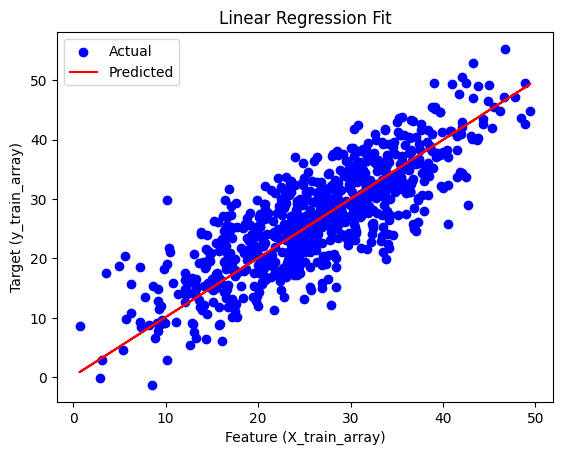

In [63]:
# Plot the linear fit

###code starts here

plt.scatter(X_train_array, y_train_array, color='blue', label='Actual')
plt.plot(X_train_array, predicted, color='red', label='Predicted')
plt.xlabel('Feature (X_train_array)')
plt.ylabel('Target (y_train_array)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()
###code ends here


**output on input values**

**Predict output on input values(in months) [17.0,50.0]**

In [64]:
###code starts here

# Define the input values
input_values = [17.0, 50.0]

# Predict the output for the input values
predicted_outputs = [w * input_value + b for input_value in input_values]

print("Predicted outputs:", predicted_outputs)




###code ends here

Predicted outputs: [array([[17.07510431]]), array([[49.93516791]])]
